In [39]:
pip install python-pptx

In [9]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [10]:
# Specify your data directory here (change as needed)
data_dir = r"D:\IIT Kanpur\Placement\Self Project\Data Analyst Capstone\mturkfitbit_export_4.12.16-5.12.16\fitbit"

# Load data files into pandas DataFrames
daily_activity = pd.read_csv(os.path.join(data_dir, 'dailyActivity_merged.csv'))
daily_calories = pd.read_csv(os.path.join(data_dir, 'dailyCalories_merged.csv'))
daily_intensities = pd.read_csv(os.path.join(data_dir, 'dailyIntensities_merged.csv'))
daily_steps = pd.read_csv(os.path.join(data_dir, 'dailySteps_merged.csv'))
heartrate_seconds = pd.read_csv(os.path.join(data_dir, 'heartrate_seconds_merged.csv'))
hourly_calories = pd.read_csv(os.path.join(data_dir, 'hourlyCalories_merged.csv'))
hourly_intensities = pd.read_csv(os.path.join(data_dir, 'hourlyIntensities_merged.csv'))
hourly_steps = pd.read_csv(os.path.join(data_dir, 'hourlySteps_merged.csv'))
minute_calories_narrow = pd.read_csv(os.path.join(data_dir, 'minuteCaloriesNarrow_merged.csv'))
minute_calories_wide = pd.read_csv(os.path.join(data_dir, 'minuteCaloriesWide_merged.csv'))
minute_intensities_narrow = pd.read_csv(os.path.join(data_dir, 'minuteIntensitiesNarrow_merged.csv'))
minute_intensities_wide = pd.read_csv(os.path.join(data_dir, 'minuteIntensitiesWide_merged.csv'))
minute_METs_narrow = pd.read_csv(os.path.join(data_dir, 'minuteMETsNarrow_merged.csv'))
minute_sleep = pd.read_csv(os.path.join(data_dir, 'minuteSleep_merged.csv'))
minute_steps_narrow = pd.read_csv(os.path.join(data_dir, 'minuteStepsNarrow_merged.csv'))
minute_steps_wide = pd.read_csv(os.path.join(data_dir, 'minuteStepsWide_merged.csv'))
sleep_day = pd.read_csv(os.path.join(data_dir, 'sleepDay_merged.csv'))
weight_log_info = pd.read_csv(os.path.join(data_dir, 'weightLogInfo_merged.csv'))

# Inspect head of one or more dataframes to check structure
print(daily_activity.head())
print(sleep_day.head())
print(hourly_steps.head())


           Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0  1503960366    4/12/2016       13162           8.50             8.50   
1  1503960366    4/13/2016       10735           6.97             6.97   
2  1503960366    4/14/2016       10460           6.74             6.74   
3  1503960366    4/15/2016        9762           6.28             6.28   
4  1503960366    4/16/2016       12669           8.16             8.16   

   LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                       0.0                1.88                      0.55   
1                       0.0                1.57                      0.69   
2                       0.0                2.44                      0.40   
3                       0.0                2.14                      1.26   
4                       0.0                2.71                      0.41   

   LightActiveDistance  SedentaryActiveDistance  VeryActiveMinutes  \
0                 6.06

In [12]:
# Inspect for missing values & duplicates
print(daily_activity.info())
print(daily_activity.isnull().sum())

print(sleep_day.info())
print(sleep_day.isnull().sum())

# Remove duplicates
daily_activity = daily_activity.drop_duplicates()
sleep_day = sleep_day.drop_duplicates()

# Convert date/time columns (sample for daily_activity and sleep_day)
daily_activity['ActivityDate'] = pd.to_datetime(daily_activity['ActivityDate'])
sleep_day['SleepDay'] = pd.to_datetime(sleep_day['SleepDay'])

# Inspect sleep_day for inconsistent records
print(sleep_day.describe())

# Fill/Impute missing values if reasonable (example for weight log)
weight_log_info.fillna({'Fat': weight_log_info['Fat'].mean()}, inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

C:\Users\mfati\AppData\Local\Temp\ipykernel_24000\1748853220.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sleep_day['SleepDay'] = pd.to_datetime(sleep_day['SleepDay'])


                 Id                       SleepDay  TotalSleepRecords  \
count  4.100000e+02                            410         410.000000   
mean   4.994963e+09  2016-04-26 11:38:55.609756160           1.119512   
min    1.503960e+09            2016-04-12 00:00:00           1.000000   
25%    3.977334e+09            2016-04-19 00:00:00           1.000000   
50%    4.702922e+09            2016-04-27 00:00:00           1.000000   
75%    6.962181e+09            2016-05-04 00:00:00           1.000000   
max    8.792010e+09            2016-05-12 00:00:00           3.000000   
std    2.060863e+09                            NaN           0.346636   

       TotalMinutesAsleep  TotalTimeInBed  
count          410.000000      410.000000  
mean           419.173171      458.482927  
min             58.000000       61.000000  
25%            361.000000      403.750000  
50%            432.500000      463.000000  
75%            490.000000      526.000000  
max            796.000000      961

In [15]:
# Examine unique users
unique_users = daily_activity['Id'].nunique()
print(f"Number of unique users: {unique_users}")

# Aggregate steps, calories, and sleep per user
user_daily_summary = daily_activity.groupby('Id').agg({
    'TotalSteps': 'mean',
    'Calories': 'mean',
    'VeryActiveMinutes': 'mean',
    'SedentaryMinutes': 'mean'
}).reset_index()

user_sleep_summary = sleep_day.groupby('Id').agg({
    'TotalSleepRecords': 'mean',
    'TotalMinutesAsleep': 'mean',
    'TotalTimeInBed': 'mean'
}).reset_index()


Number of unique users: 33


In [17]:
# Merge daily activity and sleep on Id
user_merged = pd.merge(user_daily_summary, user_sleep_summary, on='Id')

print(user_merged.head())


           Id    TotalSteps     Calories  VeryActiveMinutes  SedentaryMinutes  \
0  1503960366  12116.741935  1816.419355          38.709677        848.161290   
1  1644430081   7282.966667  2811.300000           9.566667       1161.866667   
2  1844505072   2580.064516  1573.483871           0.129032       1206.612903   
3  1927972279    916.129032  2172.806452           1.322581       1317.419355   
4  2026352035   5566.870968  1540.645161           0.096774        689.419355   

   TotalSleepRecords  TotalMinutesAsleep  TotalTimeInBed  
0               1.08          360.280000      383.200000  
1               1.00          294.000000      346.000000  
2               1.00          652.000000      961.000000  
3               1.60          417.000000      437.800000  
4               1.00          506.178571      537.642857  


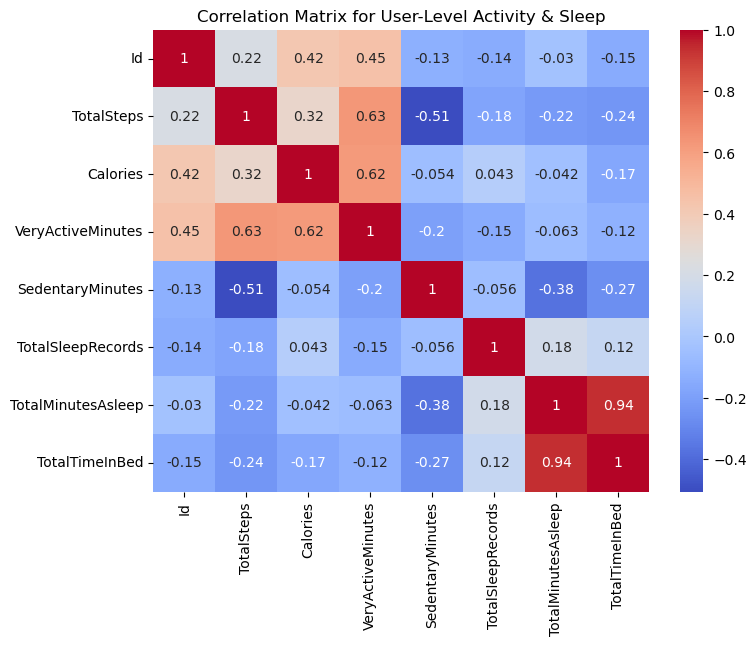

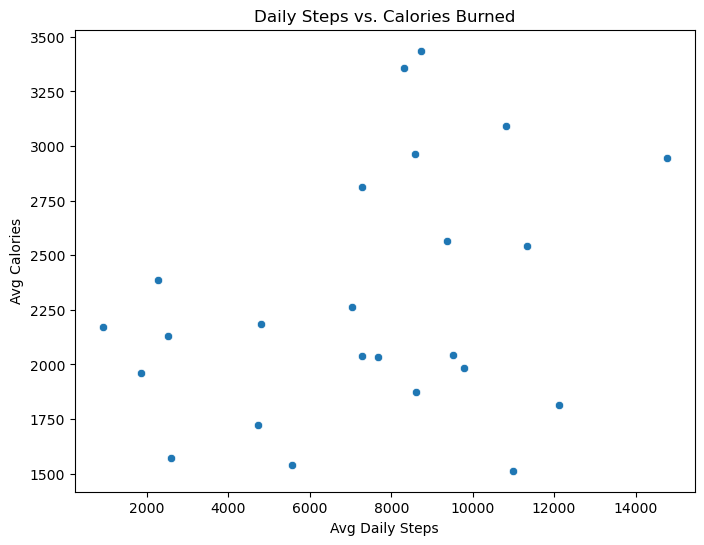

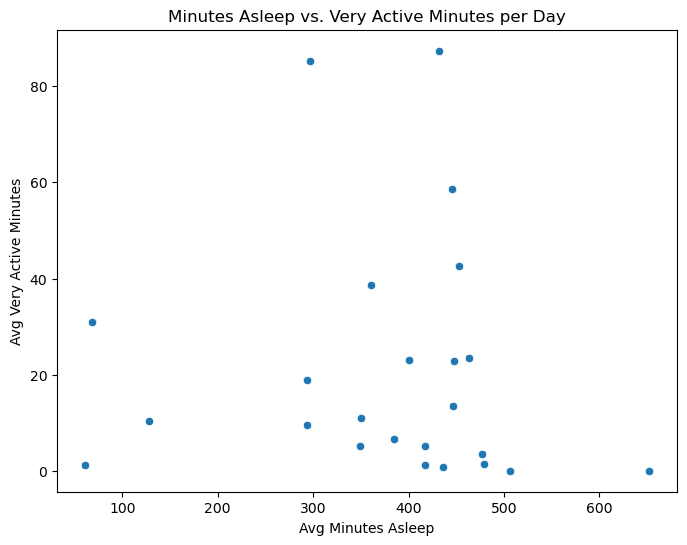

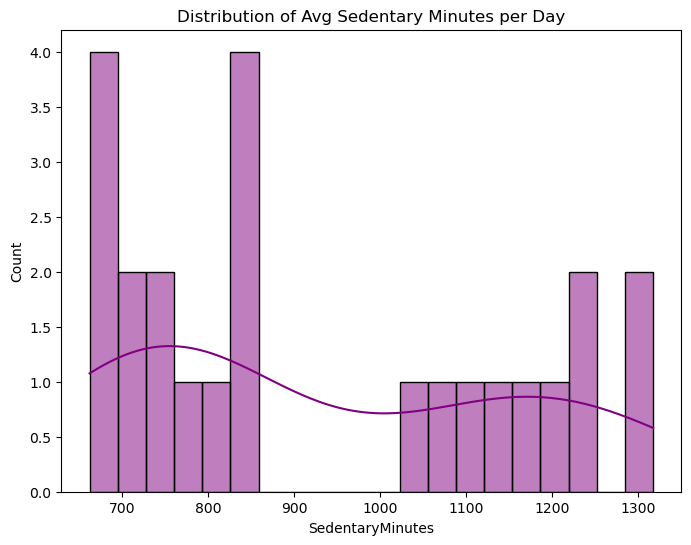

In [19]:
# Correlation analysis
plt.figure(figsize=(8,6))
sns.heatmap(user_merged.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for User-Level Activity & Sleep')
plt.show()

# Steps vs Calories
plt.figure(figsize=(8,6))
sns.scatterplot(data=user_merged, x='TotalSteps', y='Calories')
plt.title('Daily Steps vs. Calories Burned')
plt.xlabel('Avg Daily Steps')
plt.ylabel('Avg Calories')
plt.show()

# Sleep vs Activity
plt.figure(figsize=(8,6))
sns.scatterplot(data=user_merged, x='TotalMinutesAsleep', y='VeryActiveMinutes')
plt.title('Minutes Asleep vs. Very Active Minutes per Day')
plt.xlabel('Avg Minutes Asleep')
plt.ylabel('Avg Very Active Minutes')
plt.show()

# Distribution of SedentaryMinutes
plt.figure(figsize=(8,6))
sns.histplot(user_merged['SedentaryMinutes'], bins=20, kde=True, color='purple')
plt.title('Distribution of Avg Sedentary Minutes per Day')
plt.show()


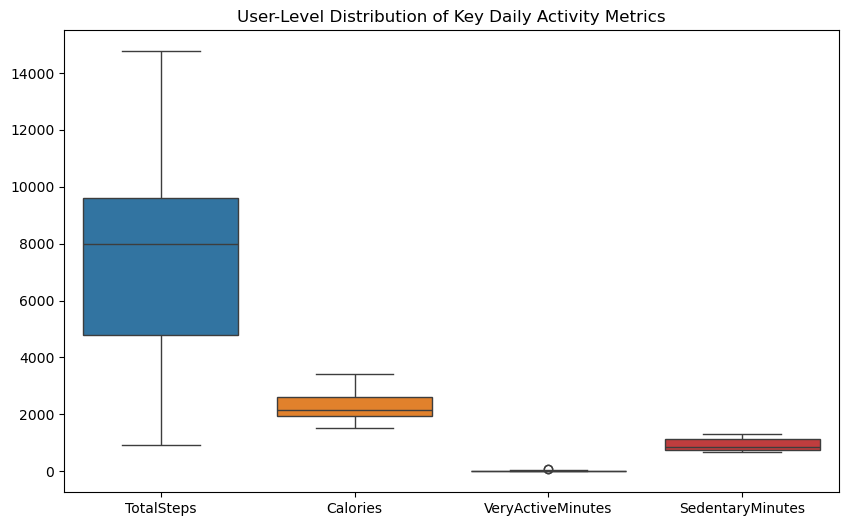

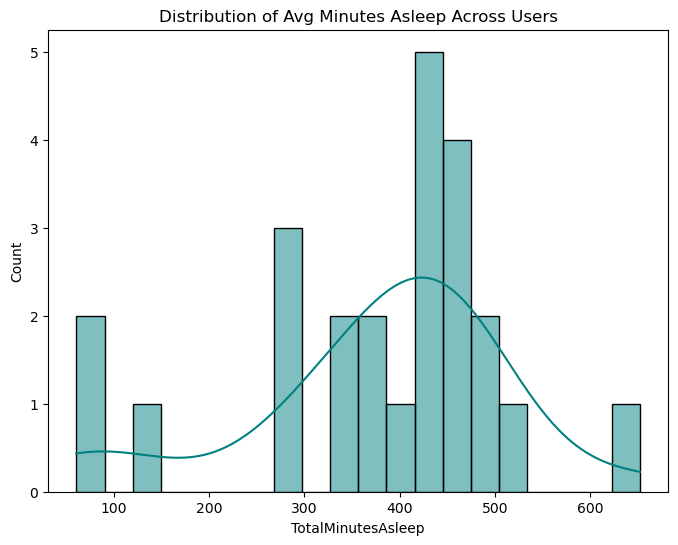

In [21]:
# Boxplot: Activity patterns
plt.figure(figsize=(10,6))
sns.boxplot(data=user_merged[['TotalSteps', 'Calories', 'VeryActiveMinutes', 'SedentaryMinutes']])
plt.title('User-Level Distribution of Key Daily Activity Metrics')
plt.show()

# Sleep quality across users
plt.figure(figsize=(8,6))
sns.histplot(user_merged['TotalMinutesAsleep'], bins=20, kde=True, color='teal')
plt.title('Distribution of Avg Minutes Asleep Across Users')
plt.show()


In [23]:
# Save example plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=user_merged, x='TotalSleepRecords', y='TotalMinutesAsleep')
plt.title('Sleep Records vs Minutes Asleep')
plt.savefig('sleep_records_vs_minutes_asleep.png')
plt.close()


In [25]:
# Add week columns to the daily dataset
daily_activity['week'] = daily_activity['ActivityDate'].dt.isocalendar().week
daily_activity['year'] = daily_activity['ActivityDate'].dt.isocalendar().year

# Calculate weekly averages for steps, calories, active minutes
week_summary = (daily_activity
    .groupby(['Id', 'year', 'week'])
    .agg({
        'TotalSteps': 'mean',
        'Calories': 'mean',
        'VeryActiveMinutes': 'mean',
        'SedentaryMinutes': 'mean'
    })
    .reset_index()
)

print(week_summary.head())

           Id  year  week    TotalSteps     Calories  VeryActiveMinutes  \
0  1503960366  2016    15  11082.166667  1815.666667          29.833333   
1  1503960366  2016    16  12294.571429  1868.714286          40.714286   
2  1503960366  2016    17  13836.285714  1949.142857          47.285714   
3  1503960366  2016    18  12744.428571  1889.857143          39.571429   
4  1503960366  2016    19   9249.750000  1365.250000          32.000000   

   SedentaryMinutes  
0        793.333333  
1        891.142857  
2        827.714286  
3        830.142857  
4        922.500000  


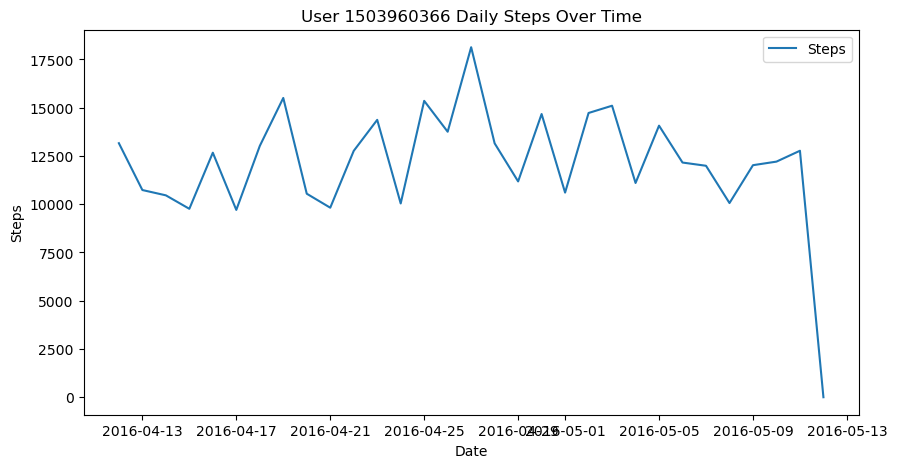

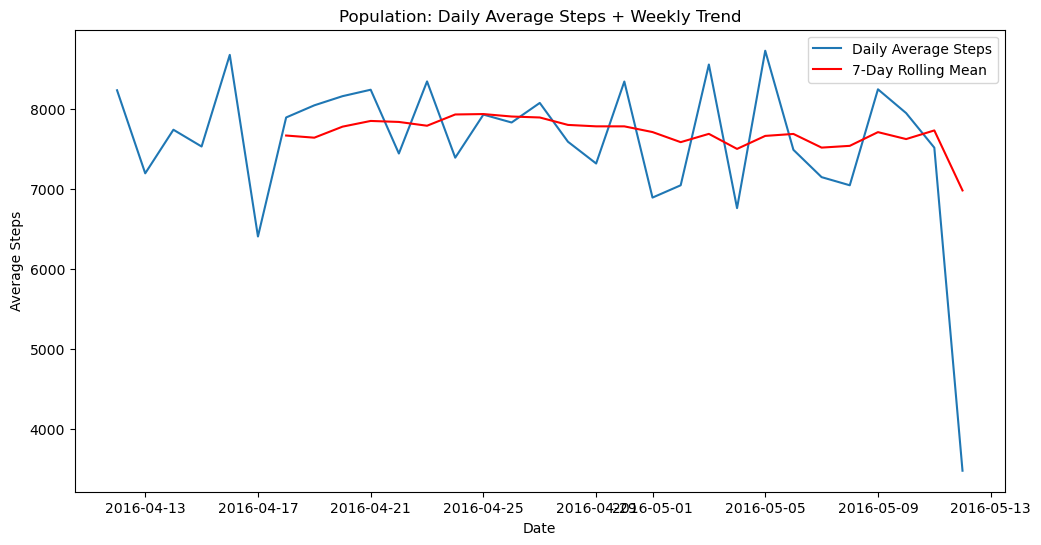

In [27]:
# Example: average steps per day over time for one user
user_id = daily_activity['Id'].unique()[0]
user_daily = daily_activity[daily_activity['Id'] == user_id].sort_values('ActivityDate')

plt.figure(figsize=(10,5))
plt.plot(user_daily['ActivityDate'], user_daily['TotalSteps'], label='Steps')
plt.title(f'User {user_id} Daily Steps Over Time')
plt.xlabel('Date')
plt.ylabel('Steps')
plt.legend()
plt.show()

# Group by date for population-level trend
pop_steps = daily_activity.groupby('ActivityDate')['TotalSteps'].mean()
pop_steps_rolling = pop_steps.rolling(window=7).mean()
plt.figure(figsize=(12,6))
plt.plot(pop_steps.index, pop_steps, label='Daily Average Steps')
plt.plot(pop_steps_rolling.index, pop_steps_rolling, color='red', label='7-Day Rolling Mean')
plt.title('Population: Daily Average Steps + Weekly Trend')
plt.xlabel('Date')
plt.ylabel('Average Steps')
plt.legend()
plt.show()


In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Create target column (1 = achieved step goal, 0 = not)
step_goal = 7500
daily_activity['achieved_goal'] = (daily_activity['TotalSteps'] >= step_goal).astype(int)

# Feature selection
features = ['Calories', 'VeryActiveMinutes', 'SedentaryMinutes', 'TotalDistance']
X = daily_activity[features]
y = daily_activity['achieved_goal']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2025)

# Model training
model = RandomForestClassifier(n_estimators=100, random_state=2025)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.97      0.98        93
           1       0.97      1.00      0.98        95

    accuracy                           0.98       188
   macro avg       0.98      0.98      0.98       188
weighted avg       0.98      0.98      0.98       188

